In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1890f38472a845d0b8abe0f7d482cd5b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KM8-ELQ6TpvqDe0B0YXfyPqAoEi_Cg8dDbleD44EzRuN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1890f38472a845d0b8abe0f7d482cd5b.get_object(Bucket='ibmhc-donotdelete-pr-ad8l7hkwb0pxzi',Key='tweet_dataset_ibm.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,Tweets,Polarity,Tweets1,Polarity1
0,Until Corona-money stop coming from IMF and wo...,0.107955,It's all because of the stupid action taken by...,-0.150000
1,I literally hear nothing but facts. They've al...,0.250000,Open lockdown. Disease spreads. Overloads hosp...,0.125000
2,#CoronaVirus | 30 new COVID-19 cases have been...,0.318182,His is right time Toe must follow central gove...,0.142857
3,7 day corona? It does not take 14 days after i...,0.227273,"Yes, I don't mind the lockdown being a surpris...",0.300000
4,The fear for Corona virus has decreased as the...,-0.400000,The lockdown enforced by the Central Governmen...,0.166667


In [3]:

body = client_1890f38472a845d0b8abe0f7d482cd5b.get_object(Bucket='ibmhc-donotdelete-pr-ad8l7hkwb0pxzi',Key='emotions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Words,Emotions
0,victimized,cheated
1,accused,cheated
2,acquitted,singled out
3,adorable,loved
4,adored,loved


In [4]:
w = df_data_2.iloc[:,0].values
e= df_data_2.iloc[:,1].values

# Cleaning Tweets column

In [5]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
corpus = []
all_stopwords=stopwords.words('english','german')
all_stopwords.remove('not')
for i in range(0,2000):
    review = re.sub('[^a-zA-Z]',' ',df_data_3['Tweets'][i])#removing all punctuations
    review = review.lower() #lower case conversion
    review = review.split() #converting statement into list of words
    review = [word for word in review if not word in set(all_stopwords)]
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsxuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Cleaning Tweets1 column

In [6]:
corpus_1=[]
for i in range(0,2000):
    review_1 = re.sub('[^a-zA-Z]',' ',df_data_3['Tweets1'][i])#removing all punctuations
    review_1 = review_1.lower() #lower case conversion
    review_1 = review_1.split() #converting statement into list of words
    review_1 = [word for word in review_1 if not word in set(all_stopwords)]
    corpus_1.append(review_1)

# Data Analysis

In [7]:
x=df_data_3.iloc[:,1].values
x1=df_data_3.iloc[:,3].values

In [8]:
positive,positive_1=0,0
negative,negative_1=0,0
neutral,neutral_1=0,0
s,s_1=0,0
avg,avg_1=0,0
for i in range(0,2000):
    if x[i]>0:
        positive+=1
    if x[i]==0:
        neutral+=1
    if x[i]<0:
        negative+=1
    if x1[i]>0:
        positive_1+=1
    if x1[i]==0:
        neutral_1+=1
    if x1[i]<0:
        negative_1+=1
    s+=x[i]
    s_1+=x1[i]
avg= s/2000
avg_1 = s/2000

In [9]:
emotion_list=[]
emotion_list_1=[]
word=df_data_2.iloc[:,0].values
emotion=df_data_2.iloc[:,1].values
for i in range(0,2000):
    for j in range(0,np.size(word)):
        if word[j] in corpus[i]:
            emotion_list.append(emotion[j])
        if word[j] in corpus_1[i]:
            emotion_list_1.append(emotion[j])
        

In [10]:
from collections import Counter
w=Counter(emotion_list)
w1=Counter(emotion_list_1)

# Data Plotting

In [11]:
plt.rcParams['figure.figsize']=(15,9)

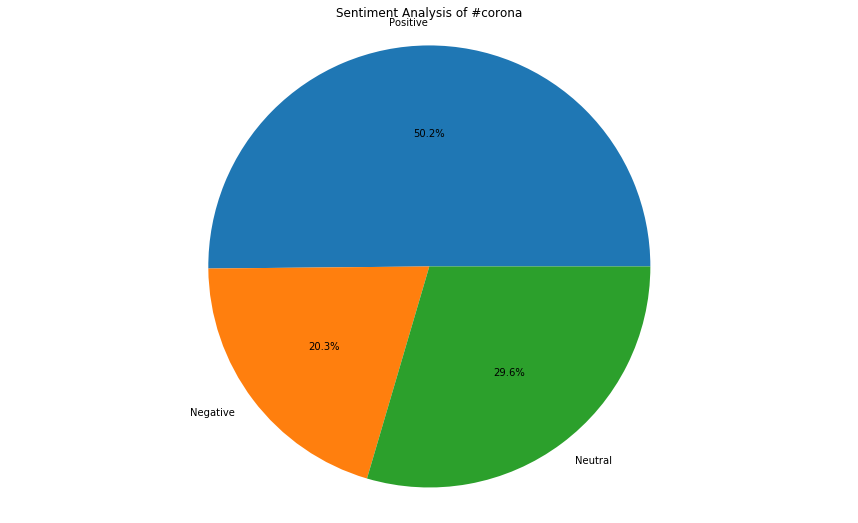

In [12]:
data_1=[positive,negative,neutral]
label_1='Positive','Negative','Neutral'
plt.pie(data_1,labels=label_1,autopct='%1.1f%%')
plt.title('Sentiment Analysis of #corona')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Counts')

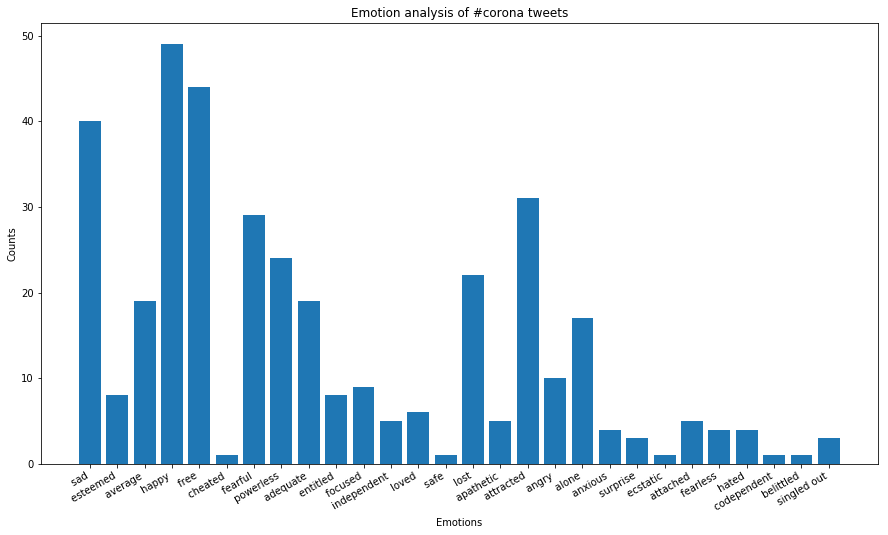

In [14]:
fig1,ax1=plt.subplots()
ax1.bar(w.keys(),w.values())
fig1.autofmt_xdate()
plt.title('Emotion analysis of #corona tweets')
plt.xlabel('Emotions')
plt.ylabel('Counts')

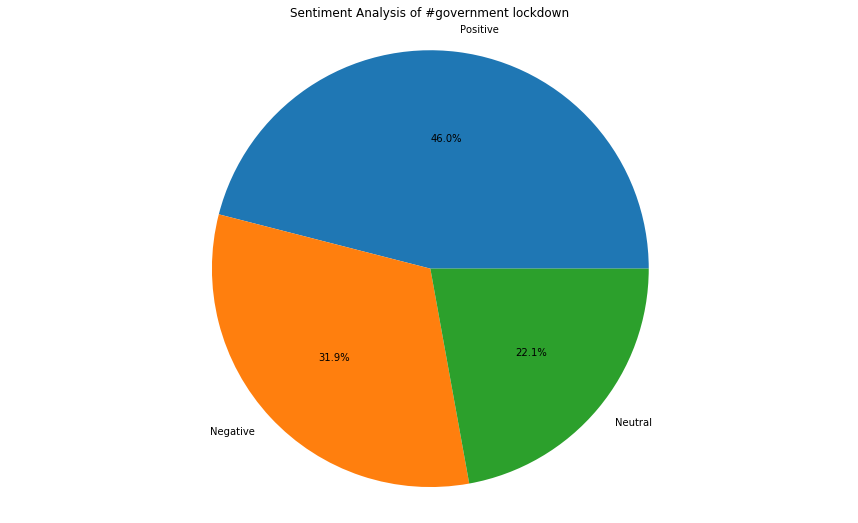

In [15]:
data_2=[positive_1,negative_1,neutral_1]
label_2='Positive','Negative','Neutral'
plt.pie(data_2,labels=label_2,autopct='%1.1f%%')
plt.title('Sentiment Analysis of #government lockdown')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Counts')

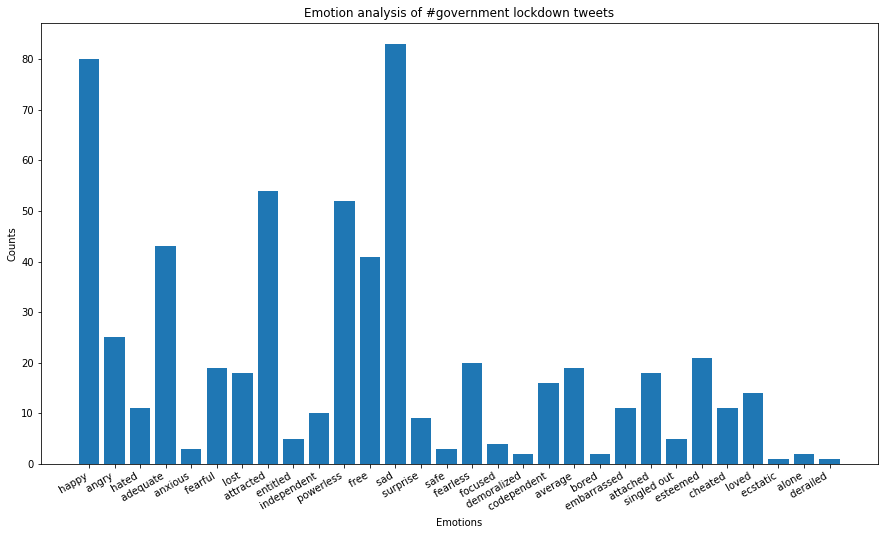

In [16]:
fig1,ax1=plt.subplots()
ax1.bar(w1.keys(),w1.values())
fig1.autofmt_xdate()
plt.title('Emotion analysis of #government lockdown tweets')
plt.xlabel('Emotions')
plt.ylabel('Counts')